# OpticalFlow

## Simple example

Bellow an example of how to run OpticalFlow

In [2]:
import sys
sys.path.append('../../bioimagepy') # change it to the directory where opticalflow is installed
from bioimagepy.process import BiProcess
import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

from IPython.display import clear_output

print("Dependencies imported")

Dependencies imported


## Load the data

In this section we load the data and display it in a interactive viewer

Images loaded


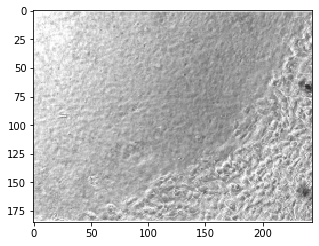

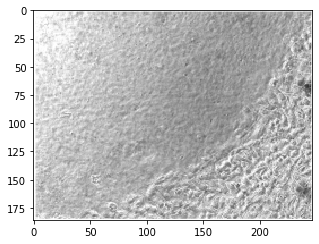

In [3]:
input_image_path1 = '../Data/opticalflow1.tif'
input_image1 = imageio.imread(input_image_path1)
plt.figure(figsize = (5,20))
plt.imshow(input_image1,cmap = 'gist_gray')

input_image_path2 = '../Data/opticalflow2.tif'
input_image2 = imageio.imread(input_image_path2)
plt.figure(figsize = (5,20))
plt.imshow(input_image2,cmap = 'gist_gray')

print("Images loaded")

## Interactive parameters selection

interactive(children=(IntSlider(value=20, description='regularization', max=40, min=1), FloatSlider(value=0.50…

<function __main__.run_opticalflow(regularization, gradient)>

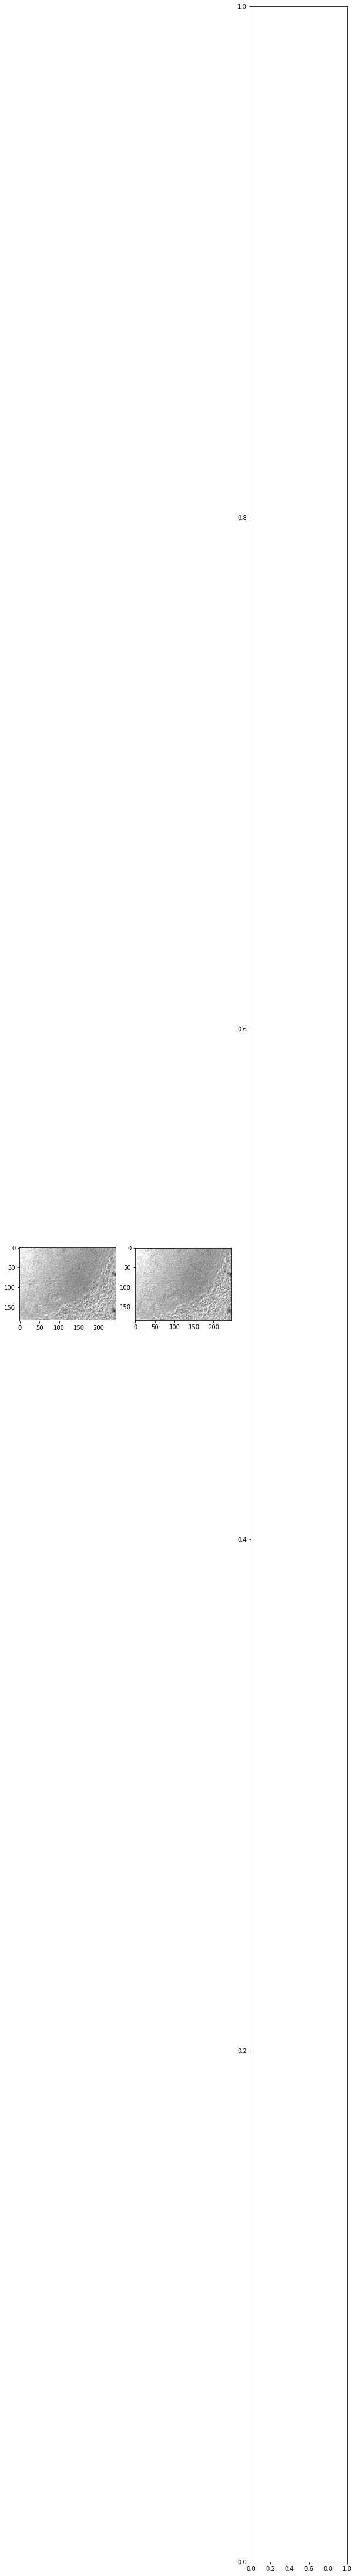

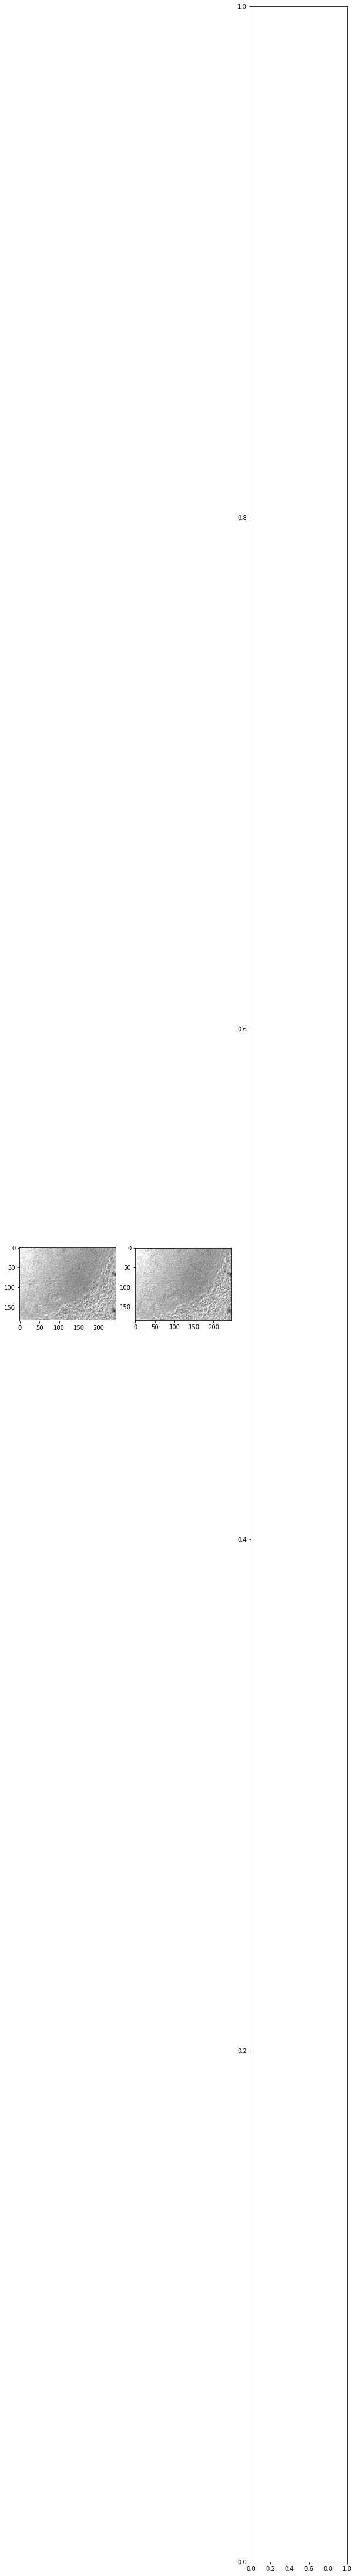

In [4]:
output_image = None
def run_opticalflow(regularization, gradient):
    global output_image
    myprocess = BiProcess('../../toolshed/opticalflow/opticalflow.xml')
    output_image = myprocess.exec('-f1', input_image_path1,
                '-f2', input_image_path2,
                '-coeff_reg', regularization,               
                '-coeff_grad', gradient,
                '-save_color', "../Output/optic_output.tif") 

    #clear_output()
    plt.figure(figsize = (10,80))
    plt.subplot(1, 3, 1)                      
    plt.imshow(input_image1,cmap = "gist_gray")
    plt.subplot(1, 3, 2)
    plt.imshow(input_image2,cmap = "gist_gray")
    plt.subplot(1, 3, 3)
    plt.imshow(imageio.imread("../Output/optic_output.tif"))
    plt.show()
    
interact_manual(run_opticalflow, regularization = (1, 40) , gradient = (0.01, 1, 0.001))